<h3>Загрузка більшості бібліотек</h3>

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

from scipy.cluster.hierarchy import dendrogram, linkage

<h3>Загрузка датасету</h3>

In [19]:
df = pd.read_csv('Wine.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [20]:
df['Customer_Segment'].value_counts()

2    71
1    59
3    48
Name: Customer_Segment, dtype: int64

<h3>Розподіл набору даних на два компоненти X і Y</h3>

In [21]:
X = df.iloc[:, 0:13].values
y = df.iloc[:, 13].values

<h3>Поділ набору даних на набір для навчання та набір для тестування</h3>

In [22]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
sc = StandardScaler()
 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<h3>Побудова логістичної регрессії без використання PCA та оцінка якості цієї моделі</h3>

In [23]:
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
    
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
y_pred

# Оцінка моделі
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print(f"Точність: {accuracy}")
print("Звіт про класифікацію:\n", report)
print("Матриця плутанини:\n", confusion)

Точність: 1.0
Звіт про класифікацію:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00         6

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Матриця плутанини:
 [[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]


<h3>Використання стандартизації та PCA</h3>

In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
 
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

pca.explained_variance_ratio_

array([0.36884109, 0.19318394])

<h3>Оцінка якості моделі з ознаками, які отримали через PCA</h3>

In [25]:
from sklearn.linear_model import LogisticRegression  
 
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [14]:
y_pred = classifier.predict(X_test)

# Оцінка моделі
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print(f"Точність: {accuracy}")
print("Звіт про класифікацію:\n", report)
print("Матриця плутанини:\n", confusion)

Точність: 0.9722222222222222
Звіт про класифікацію:
               precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.94      0.97        16
           3       1.00      1.00      1.00         6

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36

Матриця плутанини:
 [[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]


<h3>Матриця плутанини</h3>

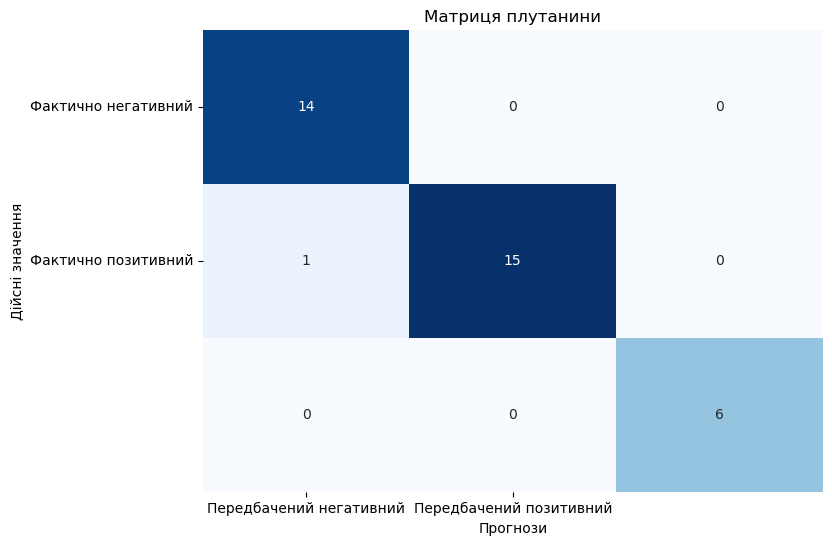

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

# Відобразити матрицю плутанини у вигляді теплової карти
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Передбачений негативний", "Передбачений позитивний"],
            yticklabels=["Фактично негативний", "Фактично позитивний"])
plt.xlabel("Прогнози")
plt.ylabel("Дійсні значення")
plt.title("Матриця плутанини")
plt.show()

C:\Users\amigo\AppData\Local\Temp\ipykernel_17084\2994199752.py:17: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


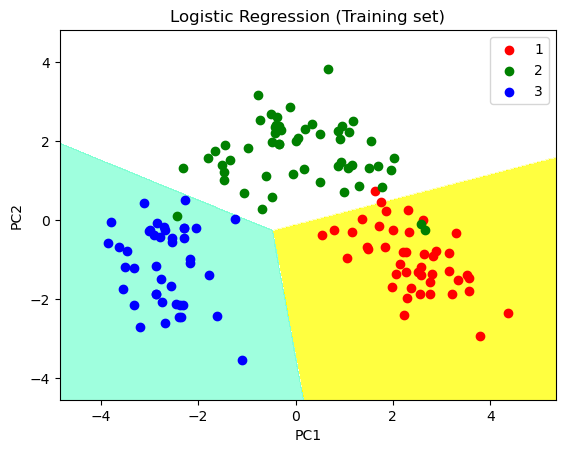

In [16]:
from matplotlib.colors import ListedColormap
 
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                     stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                     stop = X_set[:, 1].max() + 1, step = 0.01))
 
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             cmap = ListedColormap(('yellow', 'white', 'aquamarine')))
 
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
 
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
 
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1') 
plt.ylabel('PC2') 
plt.legend() 
 
plt.show()

C:\Users\amigo\AppData\Local\Temp\ipykernel_17084\1878466193.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


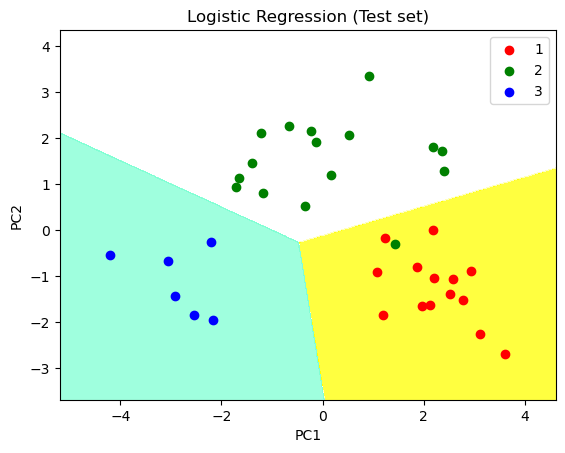

In [17]:
from matplotlib.colors import ListedColormap
 
X_set, y_set = X_test, y_test
 
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                     stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                     stop = X_set[:, 1].max() + 1, step = 0.01))
 
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             cmap = ListedColormap(('yellow', 'white', 'aquamarine'))) 
 
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
 
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
 
# title for scatter plot
plt.title('Logistic Regression (Test set)') 
plt.xlabel('PC1') 
plt.ylabel('PC2') 
plt.legend()
 
plt.show()